s
# Lab: Decision trees, part 3
With Scikit-Learn, the quality of your decision tree will depend a lot on how you select 
hyperparameters.  The purpose of this lab is to help you get familiar with the hyperparameters 
of DecisionTreeRegressor.
The lab is quite open-ended.  I want you to predict CPU performance using a regression tree.  
First create a file with this starter code shown on the next page.
Next, do the following:
- pick some predictors, and create training and test sets
- create a DecisionTreeRegressor, and set some of the hyperparameters listed in lecture:
     - min_samples_split, max_depth, min_samples_leaf, max_leaf_nodes, min_impurity_decrease
- train your tree and see what it looks like- compute the RMSE for your model on the test data  ("test RMSE")
Do this a bunch of times to see how the hyperparameters affect the appearance of your tree 
and your test RMSE.

>Be careful not to create a giant tree.  Trying to plot a giant tree can bring your machine to a 
standstill.
If you have time, try doing a grid search with cross validation to find the best hyperparameter 
settings.
(Starter code on next page)

In [16]:
import matplotlib.pyplot as plt

In [4]:

import numpy as np
import pandas as pd
from matplotlib import rcParams
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
import seaborn as sns
import graphviz 
# switch to seaborn default stylistic parameters
sns.set()
# larger plot fonts
sns.set_context('talk')
# change default plot size
rcParams['figure.figsize'] = 10,8
# read the cpu data
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2)    # clock speed in MHz


In [8]:
df

,myct,mmin,mmax,cach,chmin,chmax,prp,erp,cs
adviser 32/60,125,256,6000,256,16,128,198,199,8.00
amdahl 470v/7,29,8000,32000,32,8,32,269,253,34.48
amdahl 470v/7a,29,8000,32000,32,8,32,220,253,34.48
amdahl 470v/7b,29,8000,32000,32,8,32,172,253,34.48
amdahl 470v/7c,29,8000,16000,32,8,16,132,132,34.48
...,...,...,...,...,...,...,...,...,...
sperry 80/8,124,1000,8000,0,1,8,42,37,8.06
sperry 90/80-model-3,98,1000,8000,32,2,8,46,50,10.20
sratus 32,125,2000,8000,0,2,14,52,41,8.00
wang vs-100,480,512,8000,32,0,0,67,47,2.08


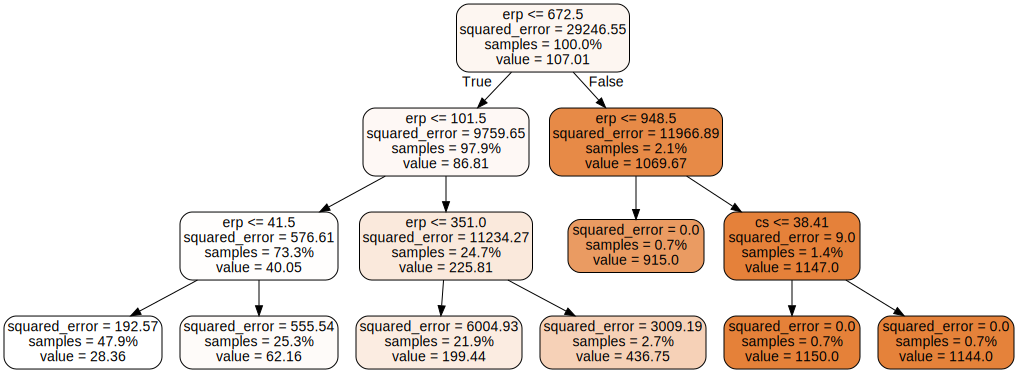

In [11]:
# get ready for Scikit-Learn
predictors = ['mmin', 'chmax', 'cach', 'erp', 'cs']      # choose predictors as you like
target = 'prp'
X = df[predictors].values
y = df[target].values
# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
# train the model
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_train, y_train)
# view the tree
# conda install python-graphviz
dot_data = export_graphviz(reg, precision=2,
                     feature_names=predictors,  
                     proportion=True,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)  
graph


rmse depth1: 126.69
rmse depth2: 82.18
rmse depth3: 60.51
rmse depth4: 60.10
rmse depth5: 50.60
rmse depth6: 51.02
rmse depth7: 55.33
rmse depth8: 51.86
rmse depth9: 53.42
rmse depth10: 51.92
rmse depth11: 53.53
rmse depth12: 52.08
rmse depth13: 55.16
rmse depth14: 52.69
rmse depth15: 54.45
rmse depth16: 51.61
rmse depth17: 53.44
rmse depth18: 51.80
rmse depth19: 52.55
rmse depth20: 52.34


Text(0, 0.5, 'rmse')

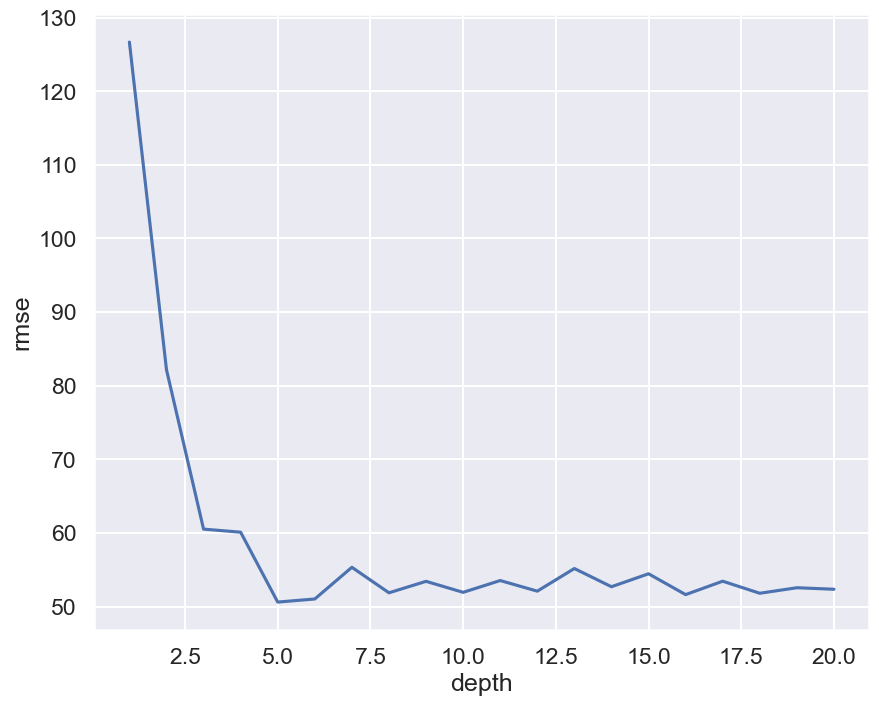

In [20]:
# make predictions and compute error
depths={}
for i in range (1,21):
    reg = DecisionTreeRegressor(max_depth=i)
    reg.fit(X_train, y_train)
    y_predict = reg.predict(X_test)
    errors = y_test - y_predict
    rmse = np.sqrt((errors**2).mean())
    print('rmse depth{}: {:0.2f}'.format(i,rmse))
    depths[i] = rmse

plt.plot(depths.keys(), depths.values())
plt.xlabel('depth')
plt.ylabel('rmse')